In [42]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [43]:
df_train = pd.read_csv("C:\\Users\\marti\\Desktop\\Etudes Sup\\A4\\Semestre 1\\Tronc commun\\Machine Learning\\PROJET\\autos.csv")

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   index                371528 non-null  int64 
 1   dateCrawled          371528 non-null  object
 2   name                 371528 non-null  object
 3   seller               371528 non-null  object
 4   offerType            371528 non-null  object
 5   price                371528 non-null  int64 
 6   abtest               371528 non-null  object
 7   vehicleType          333659 non-null  object
 8   yearOfRegistration   371528 non-null  int64 
 9   gearbox              351319 non-null  object
 10  powerPS              371528 non-null  int64 
 11  model                351044 non-null  object
 12  kilometer            371528 non-null  int64 
 13  monthOfRegistration  371528 non-null  int64 
 14  fuelType             338142 non-null  object
 15  brand                371528 non-nu

Maintenant nous allons supprimer toutes les valeurs numériques en attendant que mes deux camarades finissent le data cleaning et le feature engineering afin de pouvoir tester tous les modèles de régression. Cette étape est bien entendu provisoire et n'existera pas dans le projet final. 

In [45]:
df_numeric = df_train.select_dtypes(include=['number'])

df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   index                371528 non-null  int64
 1   price                371528 non-null  int64
 2   yearOfRegistration   371528 non-null  int64
 3   powerPS              371528 non-null  int64
 4   kilometer            371528 non-null  int64
 5   monthOfRegistration  371528 non-null  int64
 6   nrOfPictures         371528 non-null  int64
 7   postalCode           371528 non-null  int64
dtypes: int64(8)
memory usage: 22.7 MB


## **<font color='blue'>Modélisation & Prédiction</font>**

Séparation des données en features (`X`) et variable cible (`y`), puis division en ensemble d’entraînement et de test pour évaluer la performance du modèle sur des données non vues. Par défaut, la test_size est de 0.25 donc nous entrainons notre modèle sur 75% du dataset.

In [47]:
X = df_numeric.drop(columns=["price"])
y = df_numeric["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Nous allons maintenant poursuivre avec une comparaison élargie de **plusieurs modèles standards**, afin de sélectionner celui offrant le meilleur R², tout en restant simple à coder et avec un temps de calcul accessible.


In [55]:
baseline_pred = np.full_like(y_test, y_train.mean())

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
# poly_model.fit(X_train, y_train)
# poly_pred = poly_model.predict(X_test)

tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(X_train, y_train)
# rf_pred = rf_model.predict(X_test)

gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# xgb_model = XGBRegressor(random_state=42)
# xgb_model.fit(X_train, y_train)
# xgb_pred = xgb_model.predict(X_test)

# cat_model = CatBoostRegressor(verbose=0, random_state=42)
# cat_model.fit(X_train, y_train)
# cat_pred = cat_model.predict(X_test)

**Entraînement de plusieurs modèles**

Différents modèles de régression sont entraînés pour prédire `price`, incluant des modèles linéaires, arborescents et des méthodes de boosting.  
Un modèle de baseline basé sur la moyenne de `y_train` est utilisé comme référence.  
Tous les modèles sont évalués sur l’ensemble de validation pour comparer leurs performances.


In [56]:
models = {
    "Baseline": baseline_pred,
    "Linear Regression": lr_pred,
    # "Polynomial Regression": poly_pred,
    "Decision Tree": tree_pred,
    # "Random Forest": rf_pred,
    "Gradient Boosting": gb_pred,
    # "XGBoost": xgb_pred,
    # "CatBoost": cat_pred
}

r2_scores = {model: r2_score(y_test, pred) for model, pred in models.items()}
mae_scores = {model: mean_absolute_error(y_test, pred) for model, pred in models.items()}
mse_scores = {model: mean_squared_error(y_test, pred) for model, pred in models.items()}
rmse_scores = {model: np.sqrt(mean_squared_error(y_test, pred)) for model, pred in models.items()}

df_r2 = pd.DataFrame.from_dict(r2_scores, orient='index', columns=["R2 Score"])
df_mae = pd.DataFrame.from_dict(mae_scores, orient='index', columns=["Mean Absolute Error"])
df_mse = pd.DataFrame.from_dict(mse_scores, orient='index', columns=["Mean Squared Error"])
df_rmse = pd.DataFrame.from_dict(rmse_scores, orient='index', columns=["Root Mean Squared Error"])

metrics_df = pd.concat([df_r2, df_mae, df_mse, df_rmse], axis=1)
display(metrics_df)

,R2 Score,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
Baseline,-0.000269,19586.839183,3.375822e+11,581018.224975
Linear Regression,-0.003247,26001.579480,3.385871e+11,581882.391307
Decision Tree,-1.153662,11759.440365,7.268424e+11,852550.521856
Gradient Boosting,-0.092091,14489.636051,3.685712e+11,607100.680641


Les résultats obtenus sont aberrants et ne permettent pas d’évaluer correctement les performances des modèles. En effet, les scores R² négatifs et les erreurs extrêmement élevées (MAE et RMSE de plusieurs centaines de milliers) traduisent une prédiction aléatoire ou dégradée.

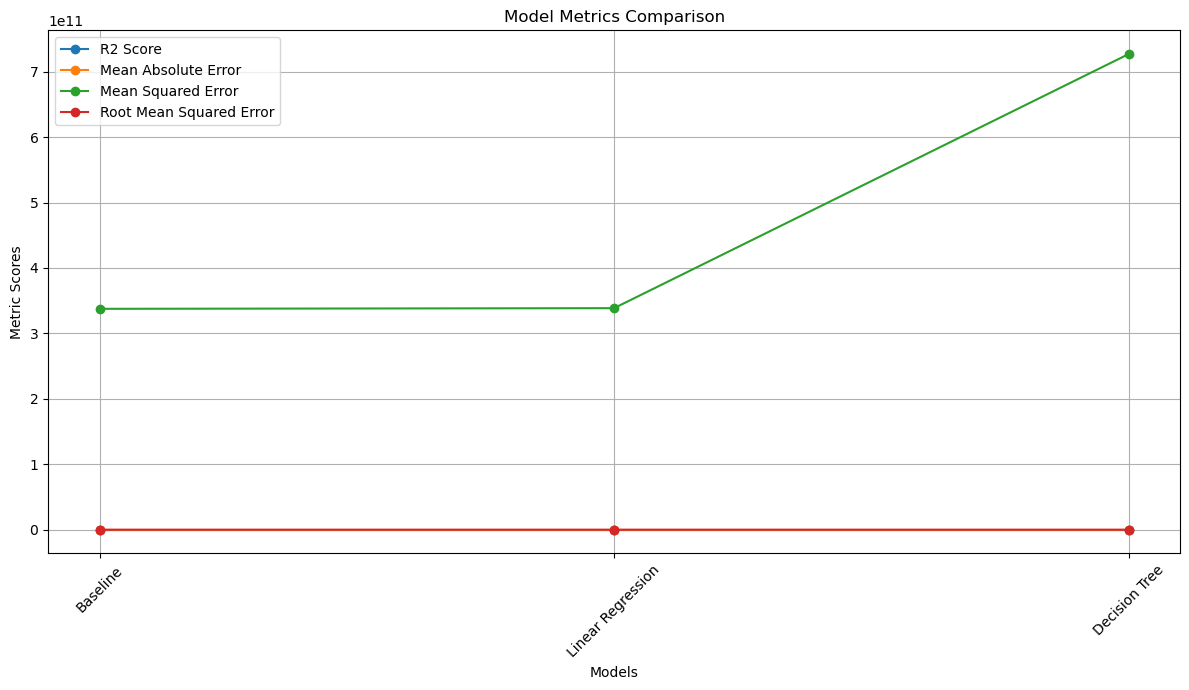

In [54]:
algorithms = list(models.keys())

plt.figure(figsize=(12, 7))

plt.plot(algorithms, df_r2.values, marker='o', label="R2 Score")
plt.plot(algorithms, df_mae.values, marker='o', label="Mean Absolute Error")
plt.plot(algorithms, df_mse.values, marker='o', label="Mean Squared Error")
plt.plot(algorithms, df_rmse.values, marker='o', label="Root Mean Squared Error")

plt.title("Model Metrics Comparison")
plt.xlabel("Models")
plt.ylabel("Metric Scores")
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

En l’absence des étapes précédentes, le jeu de données utilisé est en réalité un mini-dataset partiel et non représentatif, ce qui fausse complètement les résultats et empêche toute interprétation fiable des performances des modèles.

En explorant le dataset sur Kaggle, nous avons observé que d’autres utilisateurs obtiennent des **résultats nettement meilleurs** en utilisant des modèles plus avancés tels que **XGBoost**, **CatBoost** ou encore des ensembles optimisés de **Random Forest** et **Extra Trees**, avec des **R² avoisinant 0.88**. Ces approches et configurations offrent donc des **pistes d’amélioration intéressantes** que nous analyserons et testerons dans la **suite du projet** afin d’optimiser nos performances.
